In [19]:
from scipy.stats import zscore

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('house_price.csv')

# Display the first few rows of the dataset
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


MEAN FUNCTION

In [13]:
# Calculate mean and standard deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Define outliers as points beyond 3 standard deviations from the mean
outliers_mean = df[(df['price_per_sqft'] > mean + 3*std) | (df['price_per_sqft'] < mean - 3*std)]

# Remove outliers
df_cleaned_mean = df[~((df['price_per_sqft'] > mean + 3*std) | (df['price_per_sqft'] < mean - 3*std))]
# Print the number of outliers detected
print(f"Number of outliers detected using mean function: {len(outliers_mean)}")

Number of outliers detected using mean function: 5


PERCENTILE METHOD

In [40]:
# Calculate the 5th and 95th percentiles
lower_percentile = df['price_per_sqft'].quantile(0.50)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Define outliers as points beyond these percentiles
outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]

# Remove outliers
df_cleaned_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]
# Print the number of outliers detected
print(f"Number of outliers detected using percentile method: {len(outliers_percentile)}")

Number of outliers detected using percentile method: 7259


IQR METHOD

In [29]:
# Calculate IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points beyond 1.5 * IQR from Q1 and Q3
outliers_iqr = df[(df['price_per_sqft'] < Q1 - 3*IQR) | (df['price_per_sqft'] > Q3 + 3*IQR)]

# Remove outliers
df_cleaned_iqr = df[~((df['price_per_sqft'] < Q1 - 3*IQR) | (df['price_per_sqft'] > Q3 + 3*IQR))]
# Print the number of outliers detected
print(f"Number of outliers detected using iqr method: {len(outliers_iqr)}")

Number of outliers detected using iqr method: 531


NORMAL DISTRIBUTION

In [9]:
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Detect outliers
outliers_normal = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Remove outliers
df_cleaned_normal = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

# Print the number of outliers detected
print(f"Number of outliers detected using Normal Distribution: {len(outliers_normal)}")

Number of outliers detected using Normal Distribution: 5


Z SCORE

In [21]:
# Calculate Z-scores
df['zscore'] = zscore(df['price_per_sqft'])

# Define outliers as points with Z-scores beyond 3
outliers_zscore = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

# Remove outliers
df_cleaned_zscore = df[(df['zscore'] <= 3) & (df['zscore'] >= -3)]
# Print the number of outliers detected
print(f"Number of outliers detected using z score: {len(outliers_zscore)}")


Number of outliers detected using z score: 5


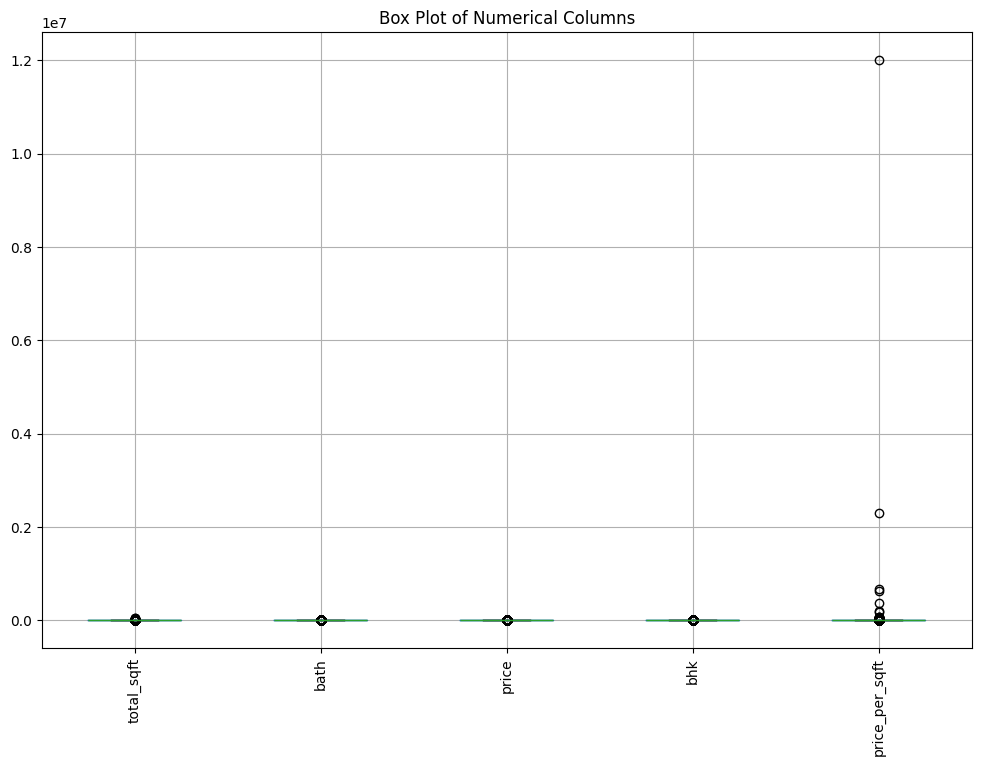

In [16]:
# Box plot for all numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Box Plot of Numerical Columns')
plt.show()

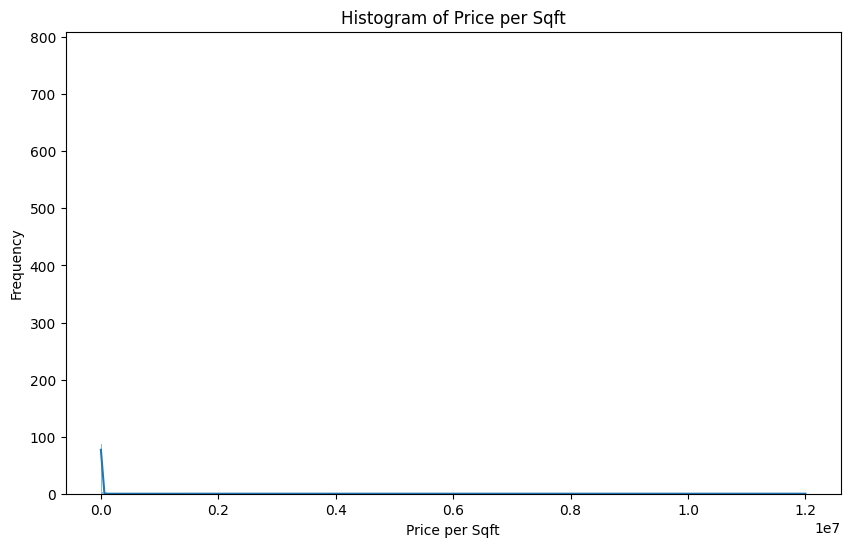

In [46]:
# Histogram for price_per_sqft
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

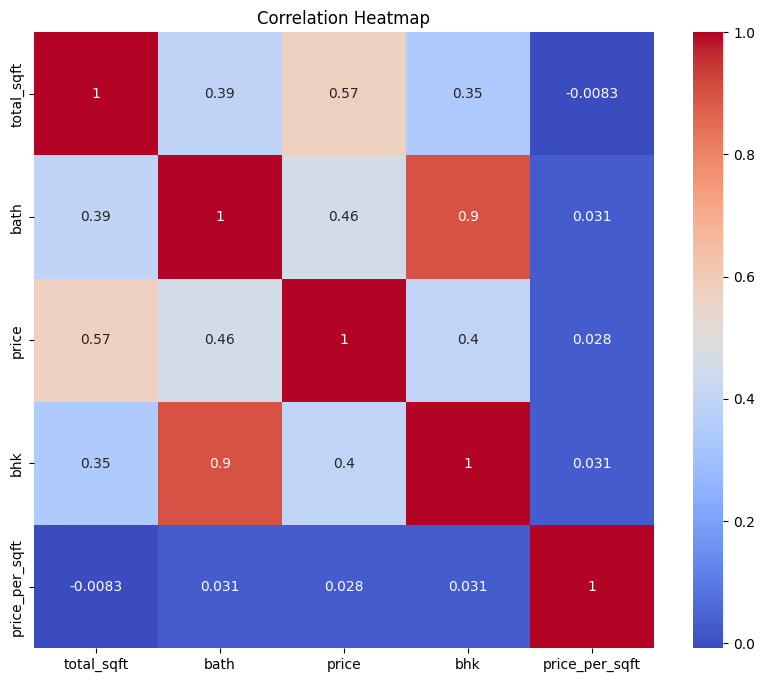

In [42]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

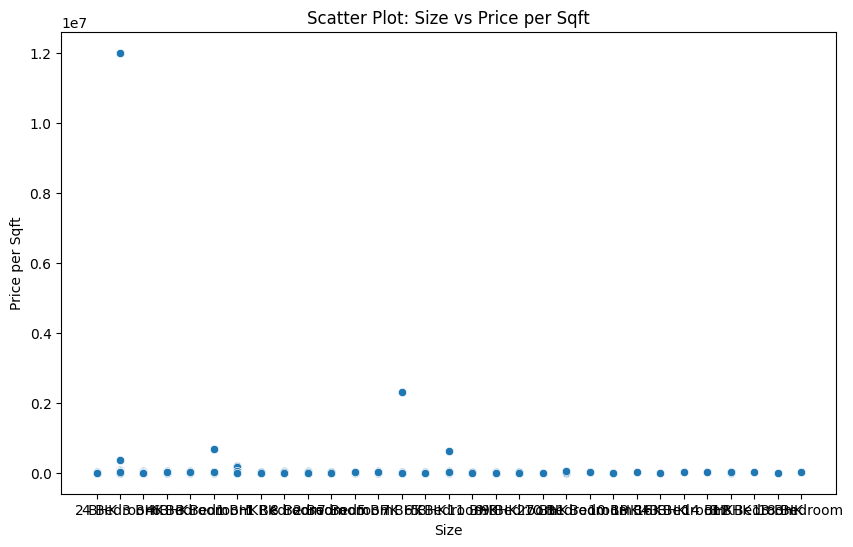

In [43]:
# Scatter plot between size and price_per_sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='price_per_sqft', data=df)
plt.title('Scatter Plot: Size vs Price per Sqft')
plt.xlabel('Size')
plt.ylabel('Price per Sqft')
plt.show()